# Movie Lens 100K EDA
## Import Libraries

In [2]:
import numpy as np
import pandas as pd


import seaborn as sns # For Graphing Data
import matplotlib.pyplot as plt

## Loading and Inspecting the Data
### Load the Datasets

In [3]:
file_path_ratings = 'Dataset/ratings.csv'
file_path_movies = 'Dataset/movies.csv'

df_ratings = pd.read_csv(file_path_ratings)
df_movies = pd.read_csv(file_path_movies)

### Check for null values and get general info

In [4]:
print("Info for Ratings Dataframe: ")
print(df_ratings.info())
print("\nInfo for Movies Dataframe: ")
print(df_movies.info())

Info for Ratings Dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Info for Movies Dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


In [5]:
print(f"Null Count for Ratings Dataframe: \n{df_ratings.isnull().sum()}\n")
print(f"Null Count for Movies Dataframe: \n{df_movies.isnull().sum()}")

Null Count for Ratings Dataframe: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Null Count for Movies Dataframe: 
movieId    0
title      0
genres     0
dtype: int64


There are **no missing values** in either dataset.

### General Statistics

In [6]:
print("---ratings.csv statistics---")
print(f"Unique Users: {df_ratings['userId'].nunique()}")
print(f"Unique Movies from Ratings Dataframe: {df_ratings['movieId'].nunique()}")
print(f"Total Ratings: {len(df_ratings)}\n")

print("---movies.csv statistics---")
print(f"Unique Movies from Movies Dataframe: {df_movies['movieId'].nunique()}")
print(f"Unique Titles: {df_movies['title'].nunique()}")
print(f"Total Movies: {len(df_movies)}")

---ratings.csv statistics---
Unique Users: 610
Unique Movies from Ratings Dataframe: 9724
Total Ratings: 100836

---movies.csv statistics---
Unique Movies from Movies Dataframe: 9742
Unique Titles: 9737
Total Movies: 9742


Cannot see the number of unique genres because they need to be processed first. Current form example: Adventure|Animation|Children|Comedy|Fantasy 

## Ratings Data Analysis

In [7]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


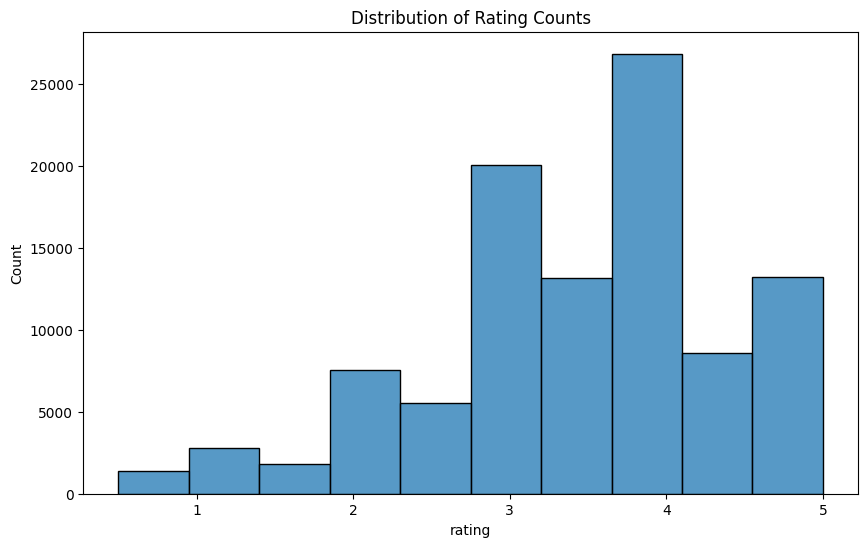

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df_ratings['rating'], bins=10, kde=False)
plt.title('Distribution of Rating Counts')
plt.show()

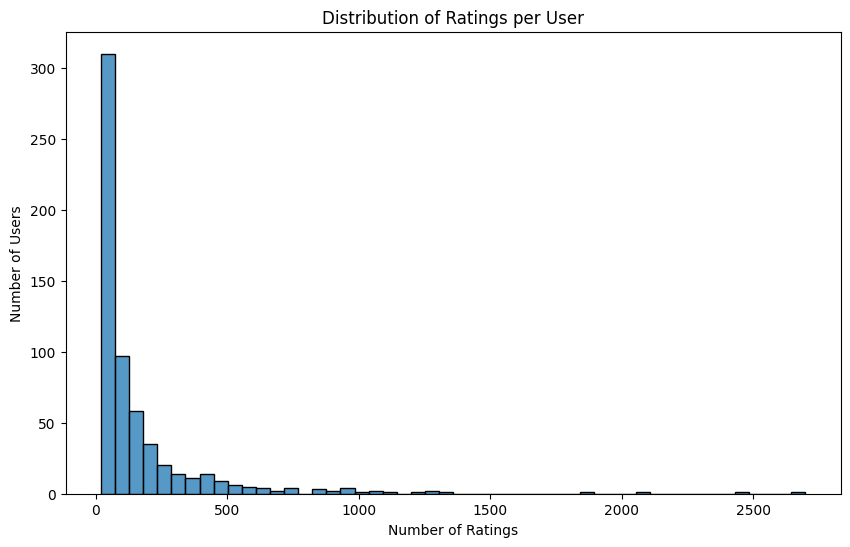

In [9]:
ratings_per_user = df_ratings['userId'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(data=ratings_per_user, bins=50)
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

Some users have submitted over 2000 movie ratings. These outliers could either be useful(someone who watches a lot of movies) or spam.

## Movie Data Analysis

In [10]:
duplicates = df_movies[df_movies['title'].duplicated(keep=False)]
duplicates

,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


There are only a few duplicates so they can be merged manually. Since there are discrepancies in the genre tags, I would recommend finding out these movie genres manually and updating the data. The duplicate can then be discarded.

In [11]:
genre_split = df_movies['genres'].str.split('|')
flattened_genre_split = [item for sublist in genre_split for item in sublist]
unique_genres = set(flattened_genre_split)
unique_genres

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [12]:
print(f"Number of Unique Genres (including '(no genres listed)': \n{len(unique_genres)}")

Number of Unique Genres (including '(no genres listed)': 
20


In [13]:
genre_split = genre_split.to_frame()
df_genres = genre_split.reindex(genre_split.columns.tolist() + list(unique_genres), axis=1, fill_value=0)
df_genres.head()

,genres,Fantasy,(no genres listed),Film-Noir,Sci-Fi,Thriller,Romance,Musical,Horror,Action,...,IMAX,Crime,Documentary,War,Comedy,Drama,Adventure,Children,Mystery,Western
0,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Adventure, Children, Fantasy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[Comedy, Romance]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama, Romance]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,[Comedy],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
genre_split.head()

,genres
0,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,"[Adventure, Children, Fantasy]"
2,"[Comedy, Romance]"
3,"[Comedy, Drama, Romance]"
4,[Comedy]


In [15]:
for idx, genre_list in enumerate(genre_split['genres']):
    for genre in genre_list:
        df_genres.loc[idx, genre] = 1

df_genres.head()

,genres,Fantasy,(no genres listed),Film-Noir,Sci-Fi,Thriller,Romance,Musical,Horror,Action,...,IMAX,Crime,Documentary,War,Comedy,Drama,Adventure,Children,Mystery,Western
0,"[Adventure, Animation, Children, Comedy, Fantasy]",1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,"[Adventure, Children, Fantasy]",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,"[Comedy, Romance]",0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,"[Comedy, Drama, Romance]",0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,[Comedy],0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
df_genres = df_genres.drop(['genres'], axis=1)
df_movies = df_movies.drop(['genres'], axis=1)

In [24]:
genre_sums = df_genres.sum()    # Saved for graph
genre_sums

Fantasy                779
(no genres listed)      34
Film-Noir               87
Sci-Fi                 980
Thriller              1894
Romance               1596
Musical                334
Horror                 978
Action                1828
Animation              611
IMAX                   158
Crime                 1199
Documentary            440
War                    382
Comedy                3756
Drama                 4361
Adventure             1263
Children               664
Mystery                573
Western                167
dtype: int64

In [18]:
df_movies = pd.concat([df_movies, df_genres], axis=1)
df_movies.head()

,movieId,title,Fantasy,(no genres listed),Film-Noir,Sci-Fi,Thriller,Romance,Musical,Horror,...,IMAX,Crime,Documentary,War,Comedy,Drama,Adventure,Children,Mystery,Western
0,1,Toy Story (1995),1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,2,Jumanji (1995),1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


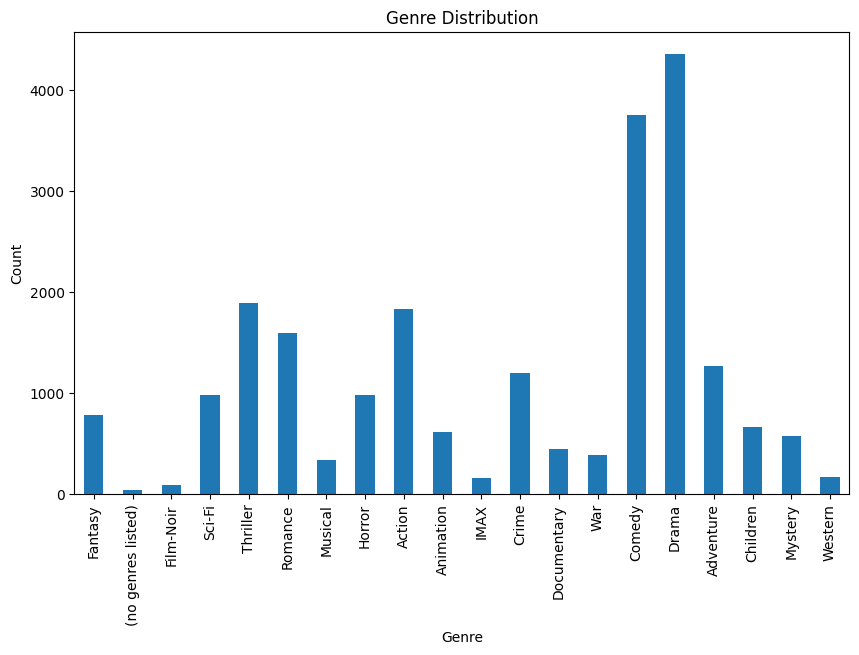

In [28]:
plt.figure(figsize=(10, 6))
genre_sums.plot(kind='bar', title='Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

## Summary
### Observations
* No null-values
* Some movie title duplicates exist in movies.csv
### Recommendations
* Multi-hot encoding to represent genres
* Manually fix duplicate discrepancies and discard unused duplicates.
* Removing the year from the movie titles and possibly making a separate feature just for the movie years.